# Detecting STR frameshift mutations in cancer patients

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 400)
pd.get_option("display.max_rows")

400

In [6]:
df_str_info = pd.read_csv(
    "/Users/maxverbiest/PhD/data/str_panels/tral_and_perf_panel_meta_info.tsv",
    sep="\t"
)
# df_patient_variation = pd.read_csv(
#     "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/patient_variation_wide_blood.csv",
#     sep=","
# )
df_patient_variation_filt = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/patient_variation_wide_blood_filt.csv",
    sep=","
)

In [ ]:
df_str_info.head()

In [ ]:
# df_patient_variation[df_patient_variation["patient_len_diff"] > 0].head()

In [ ]:
df_patient_variation.drop("tmp_id", axis=1).head()

In [ ]:
# from str_analysis_utils import filter_variation_df

# df_patient_variation_filt = filter_variation_df(df_patient_variation, df_str_info, min_period=1)

# print(df_patient_variation_filt.shape)
# df_patient_variation_filt.head()

In [7]:
print(df_patient_variation_filt['patient'].nunique())
df_patient_variation_filt.describe()

157


,repeat_id,start,end,period,ref,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff
count,4.070574e+06,4.349143e+06,4.349143e+06,4.349143e+06,4.349143e+06,4.349143e+06,4.349143e+06,4.349143e+06,4.349143e+06,4.349143e+06
mean,7.674273e+05,8.010136e+07,8.010137e+07,2.196768e+00,6.669507e+00,6.588821e+00,6.616794e+00,6.555583e+00,6.591464e+00,1.895127e-01
std,4.470135e+05,5.677332e+07,5.677332e+07,1.109006e+00,4.555599e+00,4.374119e+00,4.455601e+00,4.322861e+00,4.416769e+00,9.407101e-01
min,5.000000e+00,2.080000e+02,2.190000e+02,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.834930e+05,3.564637e+07,3.564638e+07,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00
50%,7.515800e+05,6.772400e+07,6.772401e+07,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00
75%,1.168176e+06,1.171461e+08,1.171461e+08,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,0.000000e+00
max,1.548898e+06,2.489196e+08,2.489196e+08,6.000000e+00,5.000000e+01,5.100000e+01,3.850000e+02,5.000000e+01,7.700000e+01,3.600000e+02


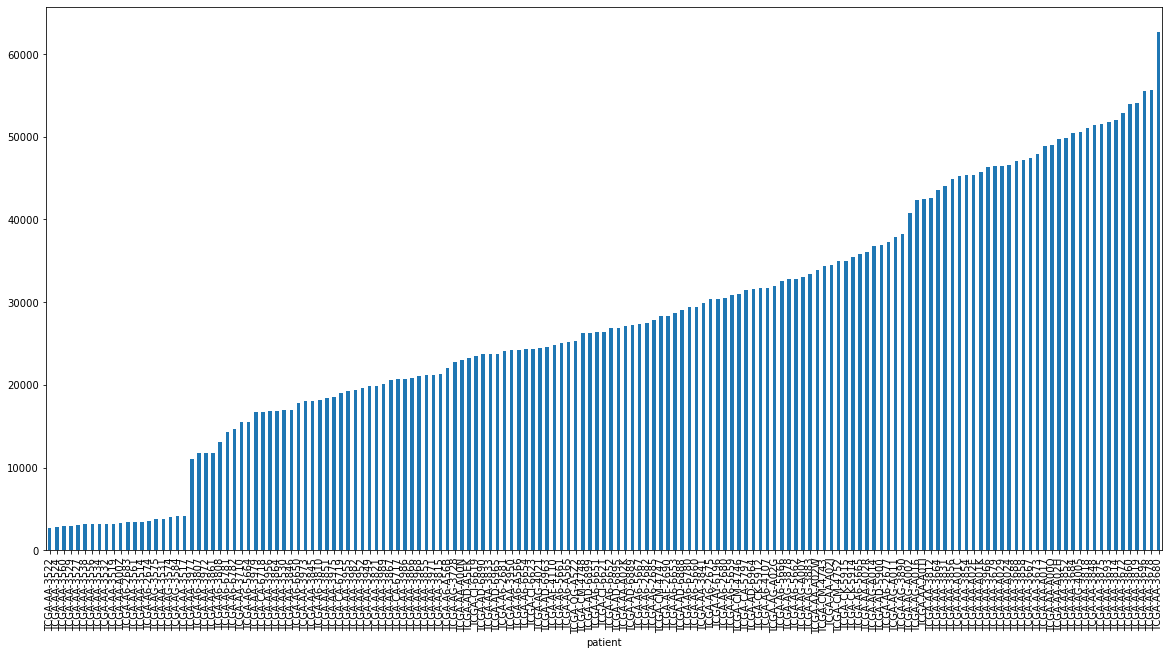

In [8]:
fig = plt.figure(figsize=(20, 10))

(
df_patient_variation_filt
    .groupby("patient")
    .size()
    .sort_values()
    .plot(kind="bar")
)

plt.show()

In [9]:
df_patient_variation_filt = (
    df_patient_variation_filt
        .groupby('patient')
        .filter(lambda x: len(x) > 5000)
        .reset_index()
)

print(df_patient_variation_filt['patient'].nunique())
df_patient_variation_filt.describe()

137


,index,repeat_id,start,end,period,ref,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff
count,4.281871e+06,4.007895e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06
mean,2.188855e+06,7.665270e+05,8.023658e+07,8.023659e+07,2.192871e+00,6.686502e+00,6.605447e+00,6.633641e+00,6.571741e+00,6.607956e+00,1.912059e-01
std,1.252340e+06,4.472002e+05,5.677642e+07,5.677642e+07,1.108283e+00,4.568258e+00,4.386314e+00,4.468222e+00,4.334652e+00,4.429091e+00,9.457584e-01
min,3.552000e+03,5.000000e+00,2.080000e+02,2.190000e+02,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.122510e+06,3.813340e+05,3.570591e+07,3.570592e+07,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00
50%,2.192977e+06,7.503710e+05,6.790948e+07,6.790948e+07,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00
75%,3.266718e+06,1.167266e+06,1.171939e+08,1.171939e+08,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,0.000000e+00
max,4.349142e+06,1.548898e+06,2.489196e+08,2.489196e+08,6.000000e+00,5.000000e+01,5.100000e+01,3.850000e+02,5.000000e+01,7.700000e+01,3.600000e+02


In [10]:
df_potential_fs = (
    df_patient_variation_filt
        .merge(df_str_info, how="left", on="tmp_id", suffixes=(None, "_tmp"))
        .query("region_type == 'CDS' and patient_len_diff > 0")
        .loc[:, df_patient_variation_filt.columns]
)

df_potential_fs.shape

(6833, 14)

In [11]:
def is_frameshift(allele_pair: tuple, period: int) -> bool:
    if (abs(allele_pair[0] - allele_pair[1]) * period) % 3 == 0:
        return False
    return True

def count_frameshifts(row) -> int:
    a_to_a = abs(row["allele_a_healthy"] - row["allele_a_tumor"]) + abs(row["allele_b_healthy"] -  row["allele_b_tumor"])
    a_to_b = abs(row["allele_a_healthy"] - row["allele_b_tumor"]) + abs(row["allele_b_healthy"] -  row["allele_a_tumor"])

    if a_to_a <= a_to_b:
        pair1 = (row["allele_a_healthy"], row["allele_a_tumor"])
        pair2 = (row["allele_b_healthy"], row["allele_b_tumor"])
    else:
        pair1 = (row["allele_a_healthy"], row["allele_b_tumor"])
        pair2 = (row["allele_b_healthy"], row["allele_a_tumor"])
    
    return is_frameshift(pair1, row["period"]) + is_frameshift(pair2, row["period"])


In [12]:
df_potential_fs["n_frameshifts"] = df_potential_fs.apply(lambda row: count_frameshifts(row), axis=1)
df_potential_fs

,index,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff,n_frameshifts
393,3945,chr10_124021238,236678.0,chr10,124021238,124021248,1,11,TCGA-A6-2675,10,9,10,10,1,1
1385,4937,chr11_105008960,421825.0,chr11,105008960,105008969,1,10,TCGA-A6-2675,9,9,10,10,2,2
1558,5110,chr11_117351932,428090.0,chr11,117351932,117351942,1,11,TCGA-A6-2675,10,10,11,11,2,2
3950,7502,chr12_4685136,538518.0,chr12,4685136,4685147,1,12,TCGA-A6-2675,11,11,12,12,2,2
4445,7997,chr12_66138157,573718.0,chr12,66138157,66138166,1,10,TCGA-A6-2675,9,9,10,10,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280495,4347767,chr9_136392009,1547485.0,chr9,136392009,136392020,3,4,TCGA-QG-A5Z2,5,5,4,4,2,0
4280581,4347853,chr9_18826257,1499629.0,chr9,18826257,18826275,1,19,TCGA-QG-A5Z2,18,18,17,18,1,1
4280688,4347960,chr9_35059650,1505336.0,chr9,35059650,35059658,1,9,TCGA-QG-A5Z2,9,9,8,8,2,2
4280789,4348061,chr9_5968044,1492572.0,chr9,5968044,5968052,1,9,TCGA-QG-A5Z2,9,9,10,10,2,2


In [13]:
df_potential_fs.describe()

,index,repeat_id,start,end,period,ref,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff,n_frameshifts
count,6.833000e+03,6.440000e+03,6.833000e+03,6.833000e+03,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000
mean,2.069014e+06,7.934398e+05,7.391891e+07,7.391893e+07,2.161715,9.049173,8.671740,8.755891,8.299137,8.396312,3.343334,0.997512
std,1.217448e+06,4.384407e+05,5.534416e+07,5.534415e+07,1.224046,4.583973,4.534133,4.747809,4.499098,4.736512,2.114566,0.985177
min,3.945000e+03,1.150000e+03,1.992210e+05,1.992320e+05,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.028032e+06,4.530460e+05,3.054623e+07,3.054624e+07,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,0.000000
50%,1.813308e+06,7.498440e+05,5.838881e+07,5.838882e+07,2.000000,9.000000,9.000000,9.000000,8.000000,8.000000,2.000000,1.000000
75%,3.160460e+06,1.186233e+06,1.136556e+08,1.136556e+08,3.000000,11.000000,11.000000,11.000000,11.000000,11.000000,4.000000,2.000000
max,4.348531e+06,1.547947e+06,2.473008e+08,2.473008e+08,6.000000,42.000000,31.000000,59.000000,30.000000,51.000000,34.000000,2.000000


In [14]:
df_potential_fs.sort_values(by="patient_len_diff", ascending=False).head(n=50)

,index,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff,n_frameshifts
2795984,2851299,chr17_42126632,503077.0,chr17,42126632,42126658,1,27,TCGA-AA-A029,26,26,9,9,34,2
1921656,1973698,chr4_20618997,93221.0,chr4,20618997,20619004,2,4,TCGA-AA-3856,15,15,4,4,22,2
878358,930400,chr3_50061561,698905.0,chr3,50061561,50061584,1,24,TCGA-AA-3672,22,22,11,12,21,2
410054,416980,chr3_50061561,698905.0,chr3,50061561,50061584,1,24,TCGA-A6-5665,22,22,11,12,21,2
2270179,2322221,chr17_42126632,503077.0,chr17,42126632,42126658,1,27,TCGA-AA-3966,26,28,16,17,21,2
2669855,2725170,chr22_41866926,1024118.0,chr22,41866926,41866964,3,13,TCGA-AA-A01I,13,13,4,4,18,0
808366,860408,chr16_67195891,813174.0,chr16,67195891,67195947,3,19,TCGA-AA-3667,23,23,14,15,17,0
3325228,3380543,chr6_16327635,8007.0,chr6,16327635,16327724,3,30,TCGA-AD-A5EK,22,41,22,24,17,0
640525,647451,chr1_15928649,1111043.0,chr1,15928649,15928658,2,5,TCGA-A6-6781,5,5,13,13,16,2
4262374,4329646,chr15_99712505,666708.0,chr15,99712505,99712537,3,11,TCGA-QG-A5Z2,10,10,18,18,16,0


In [15]:
df_potential_fs[df_potential_fs["n_frameshifts"] > 0].shape

(3509, 15)

In [ ]:
plt.rc('font', size=15)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.pie(
    df_potential_fs.groupby("period").size(), 
#     explode=[0, 0, 0, 0, 0, 0],
    labels=df_potential_fs.groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:6], 
    autopct='%.0f%%'
)
ax1.set(title=f"In CDS and variable\n(n={df_potential_fs.shape[0]})")

ax2.pie(
    df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby("period").size(), 
    labels=df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:6], 
    autopct='%.0f%%'
)
ax2.set(title=f"Frameshifts (n={df_potential_fs[df_potential_fs['n_frameshifts'] > 0].shape[0]})")

plt.show()

In [16]:
df_clinical = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/data/clinical/oxana_tcga_clinical.csv", 
).loc[:, ["case_submitter_id", "gender", "MSI", "CMS"]]
df_clinical.columns = ["patient", "gender", "MSI", "CMS"]

In [17]:
df_clinical.groupby("MSI").size()

MSI
MSI     77
MSS    335
dtype: int64

In [18]:
df_fs = df_potential_fs[df_potential_fs["n_frameshifts"] > 0]

df_fs_summary = pd.DataFrame(
    {
        "frameshift_loci": df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby(["patient"]).size(),
        "frameshift_events": df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby(["patient"]).sum()["n_frameshifts"],
        "total_calls": df_patient_variation_filt.groupby("patient").size()
    }
)
df_fs_summary["perc_fs"] = (df_fs_summary["frameshift_loci"] / df_fs_summary["total_calls"]) * 100
df_fs_summary = df_fs_summary.merge(df_clinical, how="left", on="patient")


In [19]:
df_fs_summary

,patient,frameshift_loci,frameshift_events,total_calls,perc_fs,gender,MSI,CMS
0,TCGA-A6-2675,21,39,30387,0.069109,male,MSS,CMS4
1,TCGA-A6-2677,8,16,37254,0.021474,female,MSS,CMS2
2,TCGA-A6-2680,22,43,30511,0.072105,female,MSS,CMS2
3,TCGA-A6-2681,22,43,24044,0.091499,female,MSS,CMS4
4,TCGA-A6-2682,11,22,27473,0.040039,male,MSS,CMS4
5,TCGA-A6-2685,20,40,27841,0.071837,female,MSS,CMS4
6,TCGA-A6-3807,12,24,11701,0.102555,female,MSS,CMS4
7,TCGA-A6-3808,11,22,13099,0.083976,male,MSS,CMS4
8,TCGA-A6-3810,5,10,18177,0.027507,male,MSS,CMS4
9,TCGA-A6-4107,20,37,31726,0.063040,female,MSS,CMS4


In [ ]:
df_fs_summary.groupby("MSI").describe().transpose()
df_fs_summary.groupby("MSI").size().reset_index()

In [ ]:
from scipy.stats import ttest_ind
df_fs_summary = df_fs_summary.dropna()
ttest_ind(a=df_fs_summary[df_fs_summary["MSI"] == "MSI"]["frameshift_loci"], b=df_fs_summary[df_fs_summary["MSI"] == "MSS"]["frameshift_loci"])


In [20]:
df_fs = (
    df_fs
        .merge(df_clinical, how="left", on="patient")
)

In [ ]:
# df_fs.groupby('MSI').size()
df_summ = (df_fs
    .groupby(['MSI', 'period'])
    .size().reset_index()
    .merge(df_fs_summary.groupby("MSI").size().reset_index(), how="left", on="MSI")
)
df_summ.columns = ('MSI', 'period', 'fs_events', 'sample_size')
df_summ["fs_events_per_patient"] = df_summ.apply(lambda row: row['fs_events'] / row['sample_size'], axis=1)
df_summ.pivot(
    index="period",
    columns="MSI"
)

In [ ]:
plt.rc('font', size=15)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))

patches, texts, autotexts = ax1.pie(
    df_fs[df_fs["MSI"] == "MSI"].groupby("period").size(), 
    labels=df_fs[df_fs["MSI"] == "MSI"].groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:6], 
    autopct='%.0f%%'
)
ax1.set(title=f"Frameshifts across 23 MSI patients\n(n={df_fs[df_fs['MSI'] == 'MSI'].groupby('period').size().sum()})")
for i in texts:
    i._text = f"Unit size: {i._text}"
texts[2]._y = -0.1
autotexts[3]._x = 0.75

ax2.pie(
    df_fs[df_fs["MSI"] == "MSS"].groupby("period").size(), 
    labels=df_fs[df_fs["MSI"] == "MSS"].groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:6], 
    autopct='%.0f%%'
)
ax2.set(title=f"Frameshifts across 114 MSS patients\n(n={df_fs[df_fs['MSI'] == 'MSS'].groupby('period').size().sum()})")

# ax2.pie(
#     df_fs.groupby("period").size(), 
#     labels=df_fs.groupby("period").size().index, 
#     colors=sns.color_palette('colorblind')[0:6], 
#     autopct='%.0f%%'
# )
# ax2.set(title=f"Frameshifts across 88 patients\n(n={df_fs.shape[0]})")

plt.show()

In [23]:
cols = ["#E63946", "#F1FAEE", "#A8DADC", "#457B9D", "#1D3557"]
cols = ["#1D3557", "#457B9D", "#A8DADC", "#F1FAEE", "#E63946"]

In [34]:
cols = [sns.color_palette('colorblind')[0], sns.color_palette('colorblind')[1], sns.color_palette('colorblind')[3], sns.color_palette('colorblind')[4]]




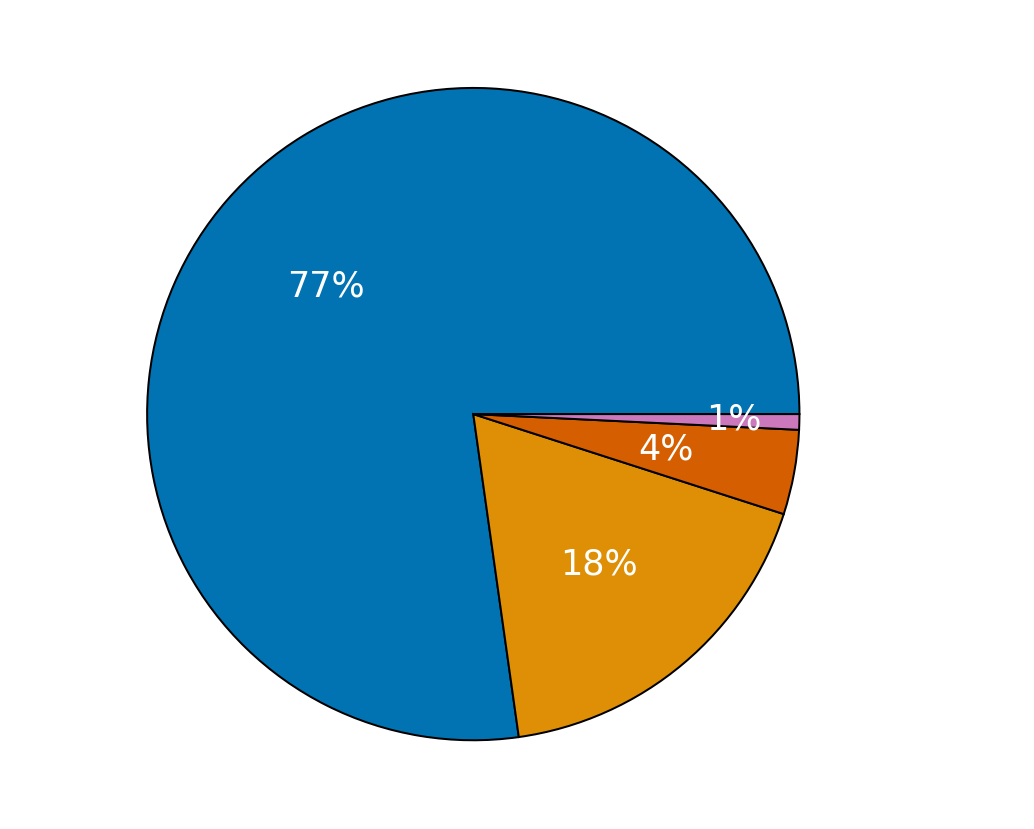

In [36]:
plt.rc('font', size=35)
plt.rcParams['text.color'] = 'white'
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

patches, texts, autotexts = ax.pie(
    df_fs.groupby("period").size(), 
    labels=df_fs.groupby("period").size().index, 
#     colors=sns.color_palette('colorblind')[0:6],
    colors=cols, 
    autopct='%.0f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 2}
)
# ax.set(title=f"{df_fs.groupby('period').size().sum()} STR frameshifts across CRC 137 patients")
autotexts[3]._x = 0.8

for i in texts:
    i._text = f"Unit size: {i._text}"

plt.show()

In [ ]:
msi_fs_loci = set(df_fs[df_fs["MSI"]  == "MSI"].tmp_id.unique())
mss_fs_loci = set(df_fs[df_fs["MSI"]  == "MSS"].tmp_id.unique())

len(msi_fs_loci.difference(mss_fs_loci))